<a href="https://colab.research.google.com/github/temple17/cs229-supplement/blob/main/Locally_weighted_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

source : https://towardsdatascience.com/locally-weighted-linear-regression-in-python-3d324108efbf

In [1]:
import numpy as np

np.random.seed(8)

X = np.random.randn(1000, 1)
y = 2*(X**3) + 10 + 4.6*np.random.randn(1000,1)

In [2]:
def wm(point, X, tau):
    # tau --> bandwidth
    # X --> training data
    # point --> the x where we want to make the prediction
    # m is the no of training examples
    m = X.shape[0]
    w = np.mat(np.eye(m))

    # calculate weights for all training examples
    for i in range(m):
        xi = X[i]
        d = (-2 * tau * tau)
        w[i, i] = np.exp(np.dot((xi-point), (xi-point).T)/d)
    return w



In [3]:
def predict(X, y, point, tau):
    m = X.shape[0]
    X_ = np.append(X, np.ones(m).reshape(m,1), axis = 1)
    point_ = np.array([point, 1])

    w = wm(point_, X_, tau)
    theta = np.linalg.pinv(X_.T*(w * X_)) * (X_.T*(w*y))
    pred = np.dot(point_, theta)

    return theta, pred

In [4]:
import matplotlib.pyplot as plt

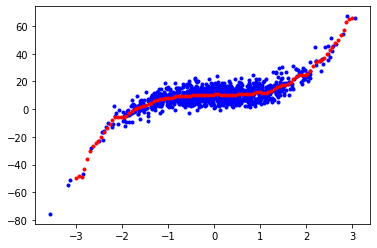

In [5]:
def plot_predictions(X, y, tau, nval):
    # nval --> number of values/points for which we are going to predict
    X_test = np.linspace(-3, 3, nval)
    preds = []
    for point in X_test:
        theta, pred = predict(X, y, point, tau)
        preds.append(pred)
    
    X_test = np.array(X_test).reshape(nval, 1)
    preds = np.array(preds).reshape(nval, 1)
    
    plt.plot(X, y, 'b.')
    plt.plot(X_test, preds, 'r.')
    plt.show()
plot_predictions(X, y, 0.08, 100)